# Assignment 1

## Question 1 - Root finding using bisection method

Begin by considering the polynomial:

$f(x) = 1.80 - 4.05x + 0.40x^2 + x^3 + x^4$

a)	Calculate the roots of this polynomial using the bisection algorithm. You can start with the file called root_find_basic.ipynb and then modify as appropriate.  The program should $start$ by filling an array of 10,000 data points between $x=-4.0$ and $x=4.0$.  Based on where the roots are, and how many there are, you may want to adjust these lower and upper limits.

Then, the program should do a sparse search of this array, i.e. once every n_search elements, to look for sign changes, and subsequently using the bisection algorithm to find the root.  The program should also keep track of the time taken to find the roots.

b)	Create a plot of the time taken to find the roots vs. the sparsification size (npts_per_slice), for npts_per_slice values between 1 and 10,000.  You can start with root_find_complete.ipynb and then modify it.

c)	Deduce the source of the various patterns that you observe in part b).  Hint:  You might consider adjusting the number of data points in the original array, as well as the coefficients of the polynomial, slightly.  HINT:  Compare the patterns that you see for limits of (-4.0,4.0), (0.0,1.5), and (0.0,1.0), using 10000 data points for each.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [12]:
def generator_function(x,*par):
    return par[0]+par[1]*x+par[2]*x*x+par[3]*x*x*x+par[4]*x*x*x*x

xl = 0.0
xh = 1.

npoints = 10000
dx = (xh-xl)/npoints

xroots = []
yroots = []

par = np.array([1.80,-4.05,0.40,1,1])
xval = np.arange(xl,xh,dx)
yval = generator_function(xval,*par)

In [13]:
start = time.time()

# Define the number of data points in each of the "slices" in x in which we will look for roots.
nsearch = 1000

# calculate the number of slices
niter = (int)(npoints/nsearch)

# use the left most data point in the first slice as the comparison point, and keep track of the number of roots found
ycomp = yval[0]
xcomp = xval[0]
nroots_found = 0

# loop over the slices
for i in range(1,int(niter)+1):
    # Begin at the right most data point in the slice 
    #print (i)
    y = yval[nsearch*i-1]
    x = xval[nsearch*i-1]
    print(i,xcomp,x,ycomp,y)

    # Check to see if we got lucky and landed on an exact zero of the function
    if (y==0):
        print ("Found exact root at x = %f\n" % x)
        xroots.append(x)
        yroots.append(0.0)
        nroots_found = nroots_found + 1
    # Otherwise, check to see if there is a root in between the left and right comparison points
    if (y*ycomp<0.0):
        # There is a root in the interval, so apply bisection method
        #
        # First, get the x-values of the left and right ends of the slice

        #print (y,ycomp)

        xlow = xcomp
        xhigh = x
        # define a "tolerance" at which point we will say we have found a zero
        epsilon = 1.0E-6

        diff = 1.0E12
        n_eps_iter = 0
        while (diff>epsilon and n_eps_iter < 1000):
            #print ("in epsilon loop")
            # Calculate the function values at the left, right, and midpoints of the slice
            fa = generator_function(xlow,*par)
            fb = generator_function(xhigh,*par)
            xmid = (xhigh+xlow)/2.0
            fc = generator_function(xmid,*par)
            #print (fa,fb,fc)
            #print (xlow,xhigh,xmid)

            # Decide if the root is in the left half or right half of the interval, and redefine
            # the x interval accordingly
            product = fa*fc
            if (product < 0):
                xhigh = xmid
            else:
                xlow = xmid

            # update the difference value
            diff = np.abs(fc)
            n_eps_iter = n_eps_iter + 1

        print ("Found root at x = %f\n" % xmid)
        xroots.append(xmid)
        yroots.append(0.0)
        nroots_found = nroots_found + 1

        # move to the next slice
        ycomp = y
        xcomp = x
    else:
        # move to the next slice
        ycomp = y
        xcomp = x

print ("Total number of roots found = %d\n" % nroots_found)

end = time.time()
print("Total time = ",(end - start))
time_ejb = (end-start)

1 0.0 0.0999 1.8 1.4004936075986003
2 0.0999 0.19990000000000002 1.4004936075986003 1.0159738123982003
3 0.19990000000000002 0.2999 1.0159738123982003 0.6564432183978003
4 0.2999 0.39990000000000003 0.6564432183978003 0.3338994255974001
5 0.39990000000000003 0.4999 0.3338994255974001 0.06274003399700004
6 0.4999 0.5999 0.06274003399700004 -0.14023735640339988
Found root at x = 0.527108

7 0.5999 0.6999000000000001 -0.14023735640339988 -0.25583514560379983
8 0.6999000000000001 0.7999 -0.25583514560379983 -0.2624557336041995
9 0.7999 0.8999 -0.2624557336041995 -0.13610152040459944
10 0.8999 0.9999 -0.13610152040459944 0.14962509399500024
Found root at x = 0.955057

Total number of roots found = 2

Total time =  0.0023651123046875


Found root at x = 0.527108

Found root at x = 0.955057

Total number of roots found = 2



/var/folders/bs/73jxx43j03b35j6l68xn_t3r0000gn/T/ipykernel_12744/328414558.py:90: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  axs.set_xlim(0,10000)


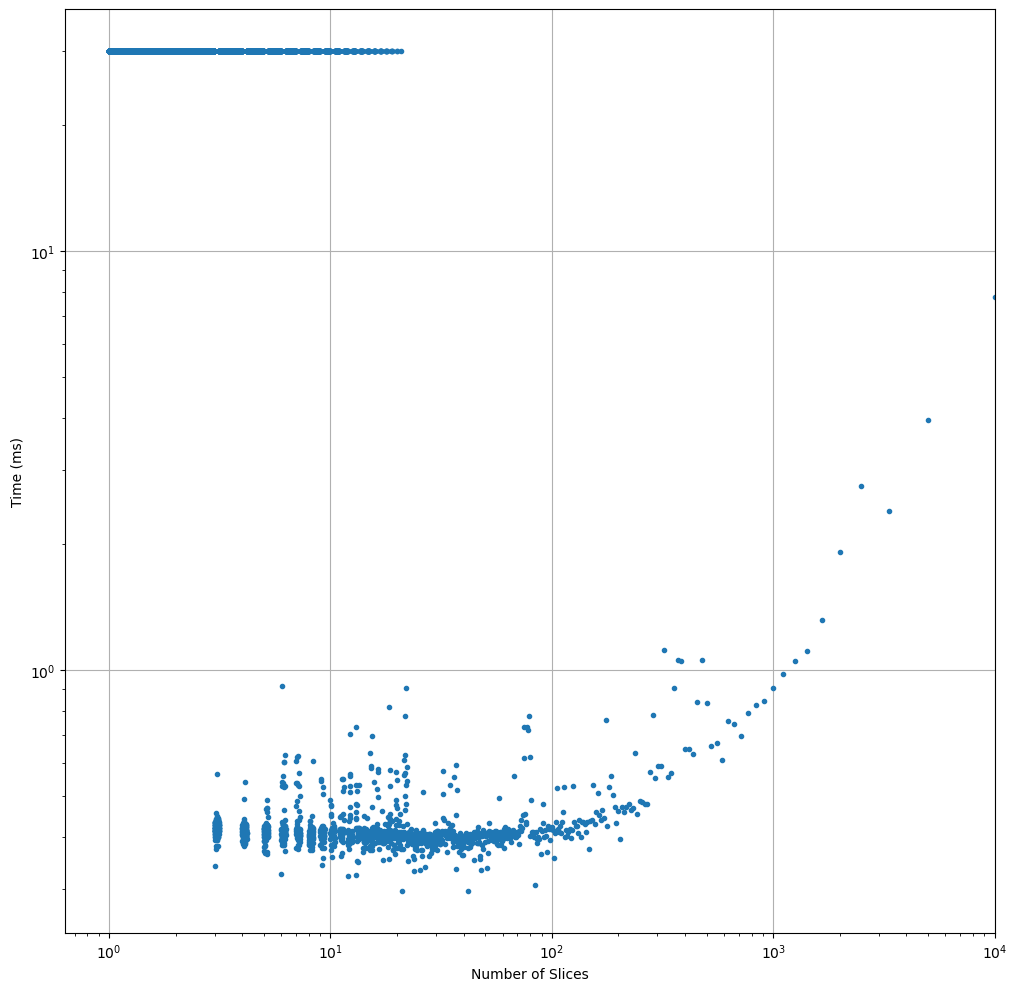

In [17]:
# Part b

xroots = []
yroots = []

# create list to hold values for plotting
#
# xstep will hold the number of slices
# xstep2 will hold the number of data points per slice

xstep = []
ystep = []
xstep2 = []

nroots_expected = 2

# Loop over various possibilities for the number of data points per slice (npts_per_slice)
for npts_per_slice in range(1,int(npoints)):
    
    start = time.time()

    # Calculate number of slices
    nslice = npoints/npts_per_slice
    
    ycomp = yval[0]
    xcomp = xval[0]
    nroots_found = 0

    # Loop over the slices, looking for possible roots in each slice
    for i in range(1,int(nslice)+1):
        y = yval[npts_per_slice*i-1]
        x = xval[npts_per_slice*i-1]
        
        if (y==0):
            if (npts_per_slice == 1):
                print ("Found exact root at x = %f\n" % x)
            nroots_found = nroots_found + 1
            
        if (y*ycomp<0.0):
            xlow = xcomp
            xhigh = x
            epsilon = 1.0E-10
            diff = 1.0E12
            while (diff>epsilon):
                fa = generator_function(xlow,*par)
                fb = generator_function(xhigh,*par)
                xmid = (xhigh+xlow)/2.0
                fc = generator_function(xmid,*par)
                product = fa*fc
                if (product < 0):
                    xhigh = xmid
                else:
                    xlow = xmid

                diff = np.abs(fc)

            if (npts_per_slice == 1):
                print ("Found root at x = %f\n" % xmid)
            nroots_found = nroots_found + 1
            ycomp = y
            xcomp = x
        else:
            ycomp = y
            xcomp = x

    if (npts_per_slice == 1):
        print ("Total number of roots found = %d\n" % nroots_found)
    
    xstep.append(nslice)
    xstep2.append(npts_per_slice)
    
    end = time.time()
    
    if (nroots_found == nroots_expected):
        ystep.append(1000.0*(end-start))
    else:
        ystep.append(30)

# Generate the figure and the axes 
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(12,12)) 

# On the first axis, plot the sine and label the ordinate
plt.yscale('log')
plt.xscale('log')
axs.plot(xstep,ystep,'.')
axs.set_ylabel('Time (ms)')
axs.set_xlabel('Number of Slices')
axs.axhline()
plt.grid(True)
axs.set_xlim(0,10000)
plt.show()

### Part c)

In the graph for part b), it looks like the time is spiking to a constant (30ms) in the lower number of slices. This is not quite the case. These times are when the algorithm fails to find a root, so the code sets the time taken as 30ms. Why is the code failing at certain numbers of slices?

## Question 2 - Fitting data

a) Go to the following site and retrieve data on the density of air as a function of altitude:

http://www.engineeringtoolbox.com/standard-atmosphere-d_604.html

Make sure to use the second table, in SI units.  

b) Modify the Jupyter Notebook that we went through in class for Non-Linear Fitting to fit the density data as a function of altitude using a function of the form:

$f(x)= Ae^{Bx+C\sqrt{x}}$

c) Determine the parameters A, B, and C, as well as the uncertainties on these parameters.

d) Plot the fit, including 95% confidence interval error bands, along with the data.  What is your evaluation of the quality of the fit?  Can you think of a different approach that might yield a better fit?

In [5]:
# Use file in JupyterNotebooks
# Split exponentials
# Guess initial parameters based on data
# Try plotting results on log scale
# Account for error bars in fitting
# Assign half of smallest digit uncertainty for each point